### IDs:
Insert yours IDs to the cell below

**ID #1:** 316298876

**ID #2:** 316298256


**Colab link:** [https://drive.google.com/file/d/1p3OJ7zDz2a7qttUGfUKK8D_fDhnFayzg/view?usp=sharing](https://drive.google.com/file/d/1p3OJ7zDz2a7qttUGfUKK8D_fDhnFayzg/view?usp=sharing)

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

# Setup

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns
from sklearn.datasets import load_boston
from scipy.stats import spearmanr as spearmanr

warnings.filterwarnings('ignore')

sns.set(style="white", palette="muted", color_codes=True)
plt.style.use('seaborn')

# Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

## 1

The dataset contains 506 samples and 13 features. The data types are real positvie numbers.

In [2]:
boston = load_boston()

X = boston.data
columns = list(boston.feature_names)
y = boston.target
boston_df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), columns= columns + ['MEDV'])

print(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


**Features and their description**

*   CRIM per capita crime rate by town
*   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS proportion of non-retail business acres per town
*   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX nitric oxides concentration (parts per 10 million)
*   RM average number of rooms per dwelling
*   AGE proportion of owner-occupied units built prior to 1940
*   DIS weighted distances to five Boston employment centres
*   RAD index of accessibility to radial highways
*   TAX full-value property-tax rate per dollar 10,000.
*   PTRATIO pupil-teacher ratio by town
*   B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT % lower status of the population
*   MEDV Median value of owner-occupied homes in $1000's

## 2

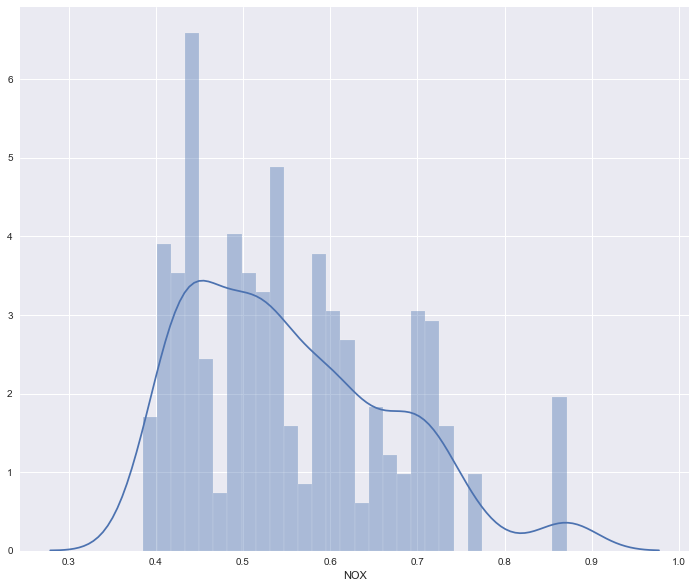

In [3]:
plt.figure(figsize=(12, 10))
sns.distplot(boston_df['NOX'], bins=30)
plt.show()

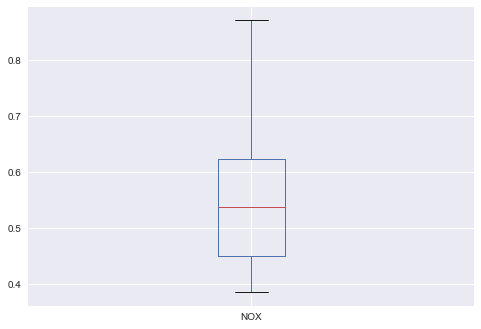

In [4]:
nox_series = boston_df['NOX']
nox_series.plot.box()

**Distribution**

The distribution looks like a log normal, the mean is approx. 0.54, The IQR is approx. between 0.45 to 0.62

## 3

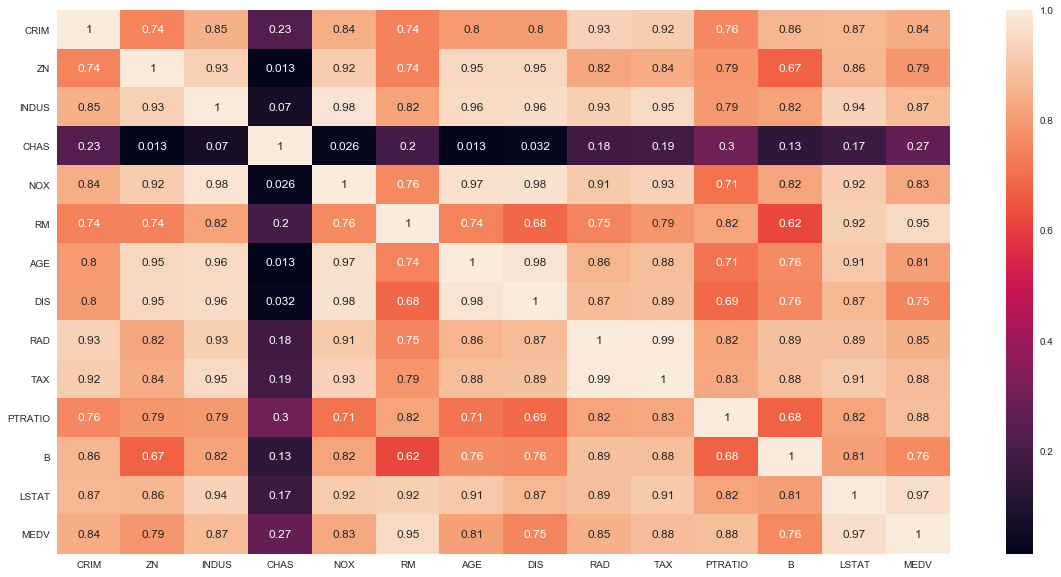

In [5]:
boston_corrMatrix = boston_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(boston_corrMatrix.corr().abs(),  annot=True)

**Unusual Behaviour**

RAD ans TAX has a significant correlation. CHAS has an unusual behaveiour as it seems to have similar correlation with all features because it is a dummy variable - equals to 0.0 for most of the instances.

## 4

TAX - full-value property-tax rate per dollar 10,000.
RAD - RAD index of accessibility to radial highways.


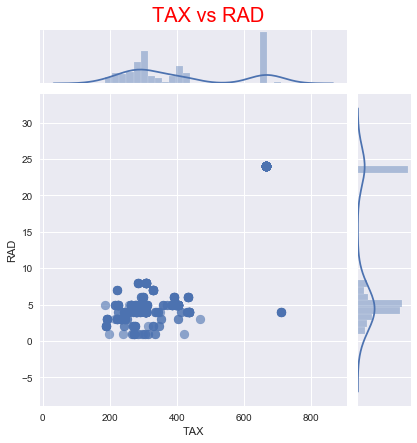

In [46]:
print("TAX - full-value property-tax rate per dollar 10,000.")
print("RAD - RAD index of accessibility to radial highways.")

sns.jointplot(data=boston_df, x="TAX", y="RAD", s=80, alpha=0.6, marginal_kws={'bins': 25, 'kde': True})
plt.suptitle("TAX vs RAD", va='bottom', fontsize=20, color='red')
plt.show()

NOX - nitric oxides concentration (parts per 10 million).
DIS - DIS weighted distances to five Boston employment centres.


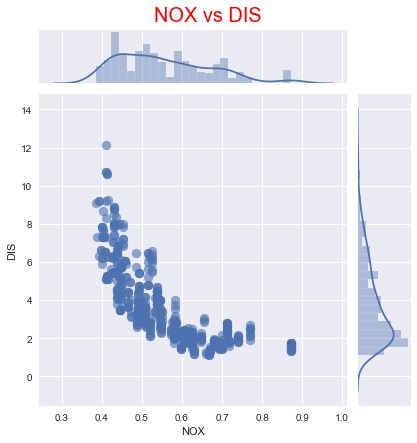

In [48]:
print("NOX - nitric oxides concentration (parts per 10 million).")
print("DIS - DIS weighted distances to five Boston employment centres.")

sns.jointplot(data=boston_df, x="NOX", y="DIS", s=80, alpha=0.6, marginal_kws={'bins': 25, 'kde': True})
plt.suptitle("NOX vs DIS", va='bottom', fontsize=20, color='red')

plt.show()

##5.

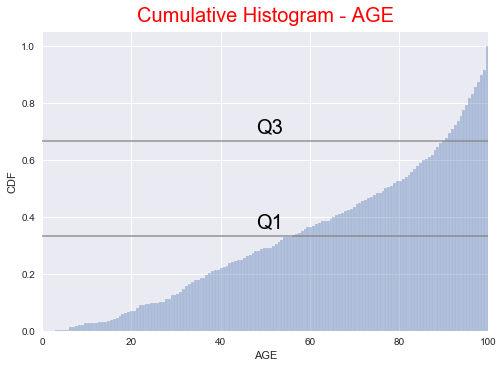

In [49]:
sns.distplot(boston_df.AGE, bins=150, hist_kws={'cumulative': True}, kde_kws={'lw': 0})
plt.xlabel("AGE")
plt.ylabel("CDF")
plt.title("Cumulative Histogram - AGE", va='bottom', fontsize=20, color='red')

plt.axhline(2/3, color='gray', alpha=0.7)
plt.text(48, 2/3 + 0.03, 'Q3', color='black', fontsize=20)

plt.axhline(1/3, color='gray', alpha=0.7)
plt.text(48, 1/3 + 0.03, 'Q1', color='black', fontsize=20)

plt.xlim(0,boston_df.AGE.max())

plt.show()

##6

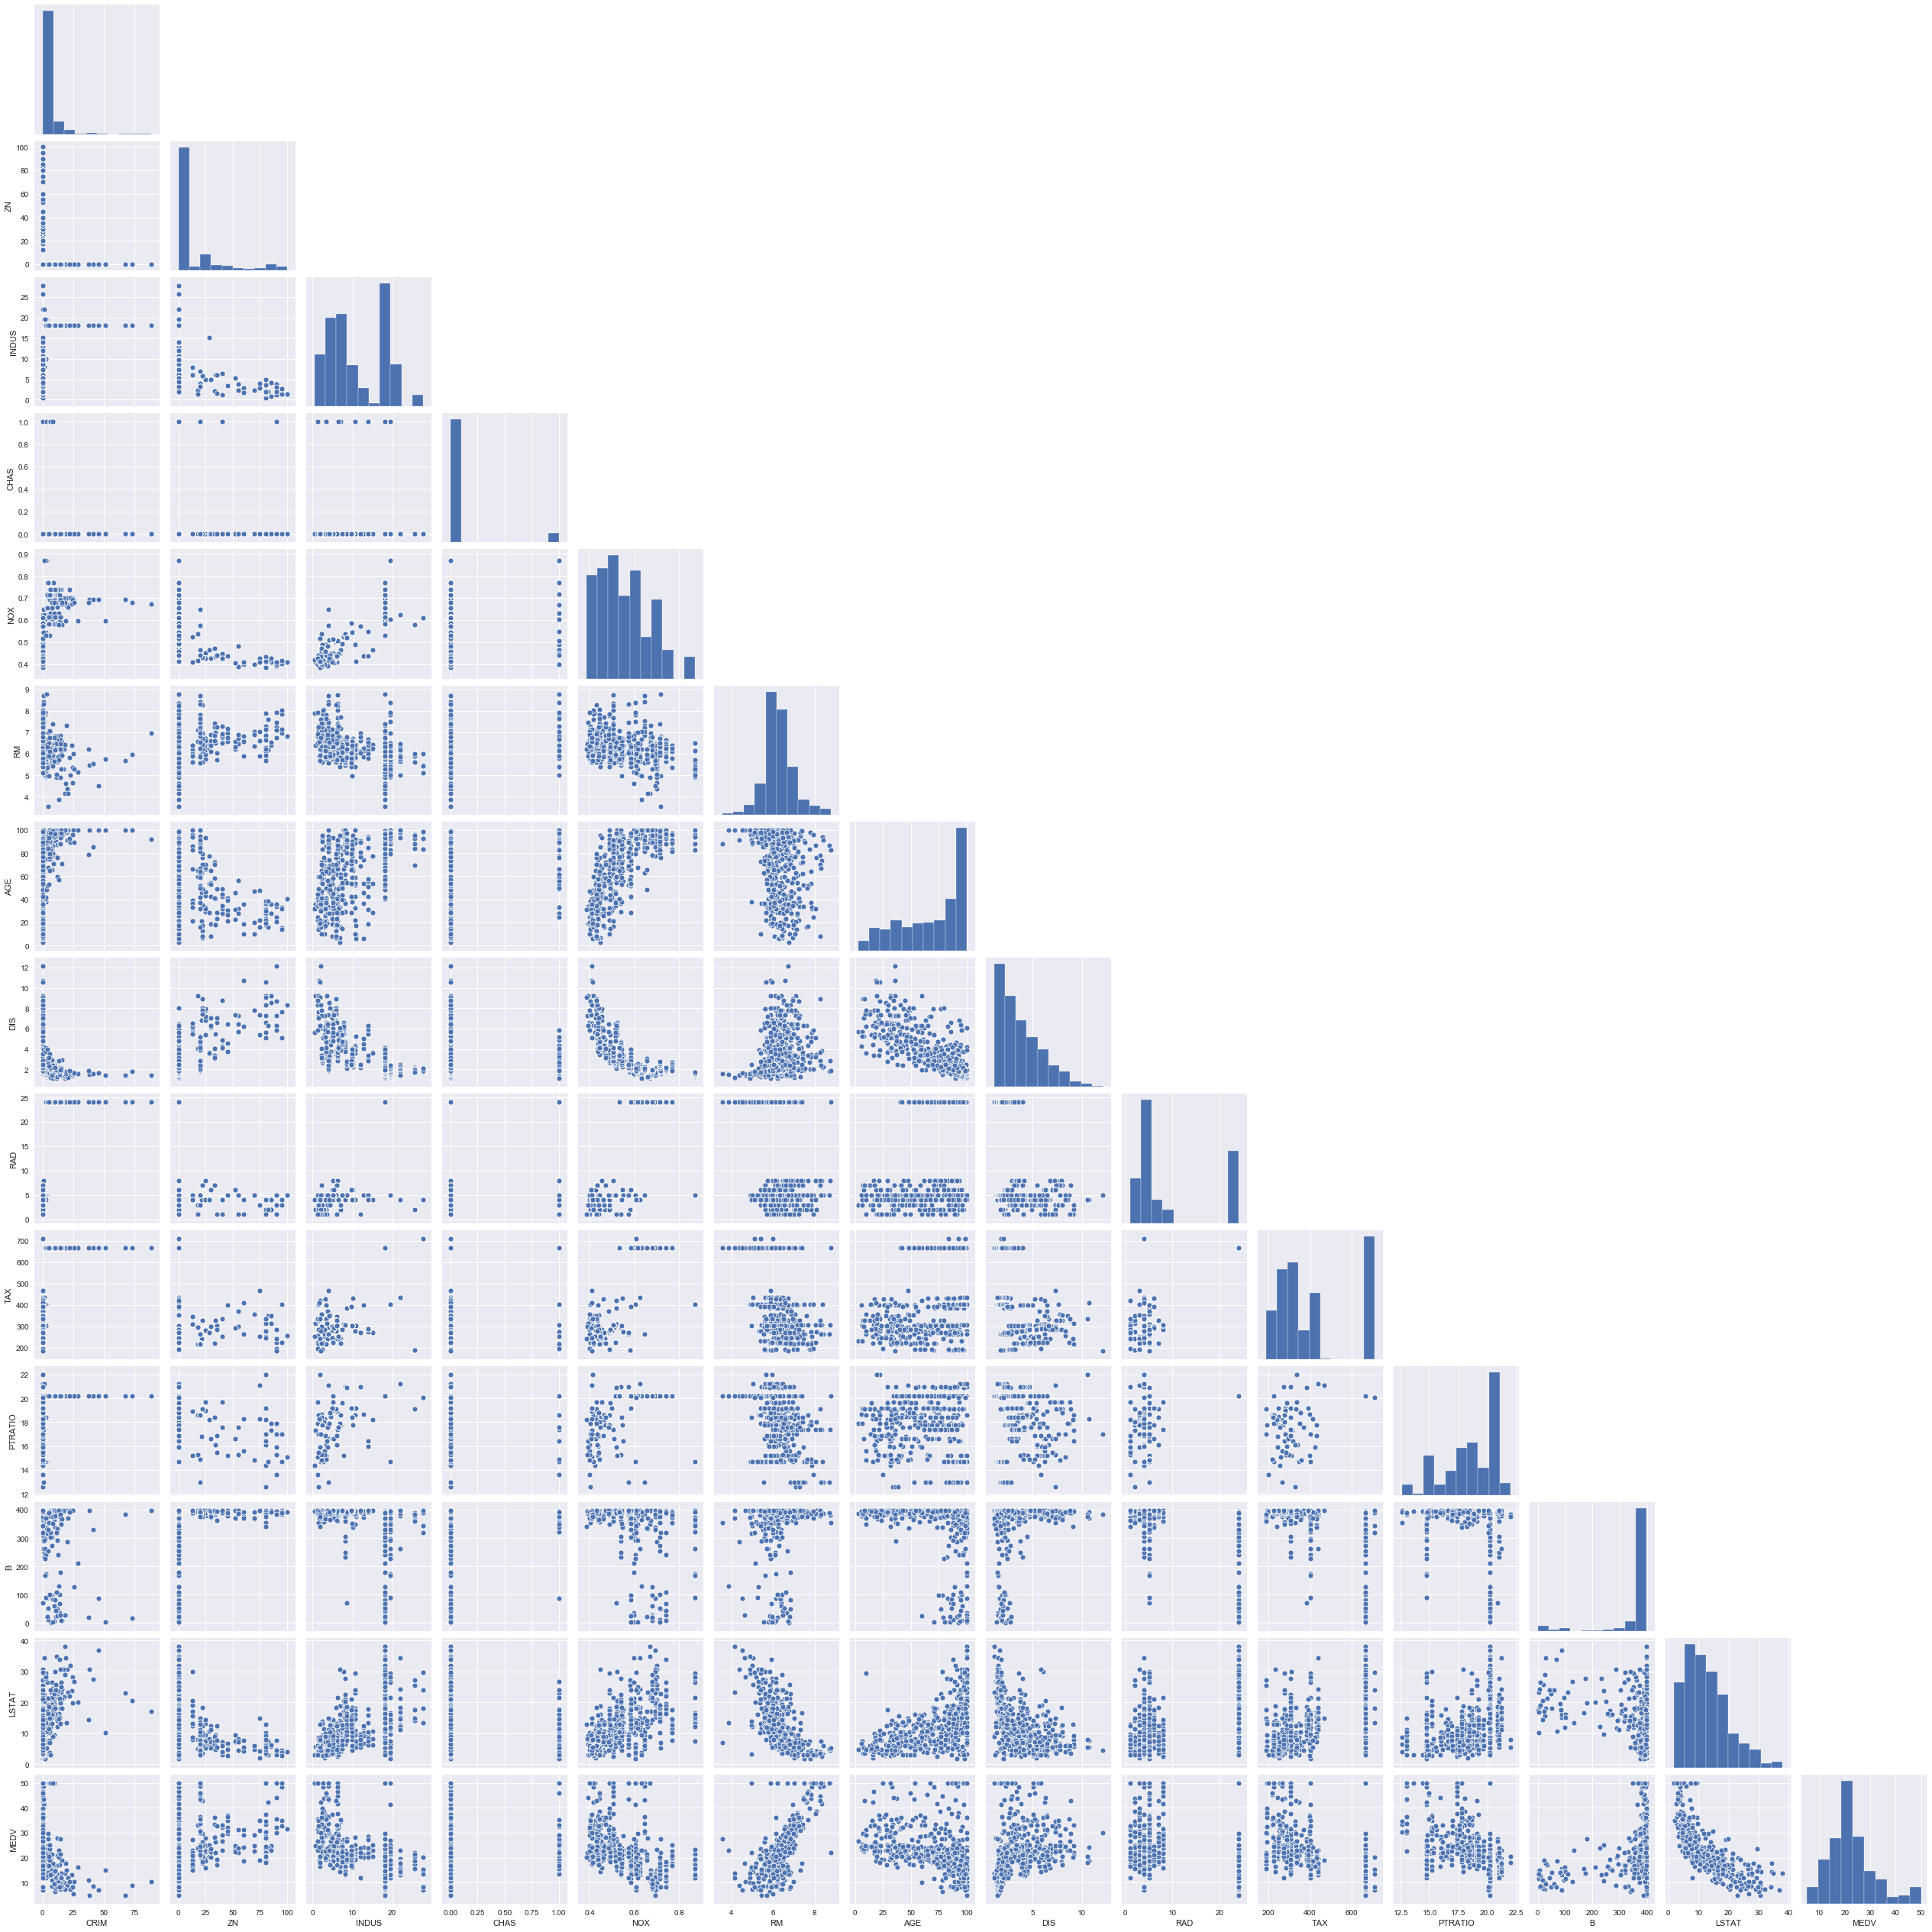

In [9]:
sns.pairplot(boston_df, corner=True)

**Interesting trends**

The correlation between TAX, PTRATIO, RM and the price predicted(MEDV) wasn't a suprise but the NOX(nitric oxides concentration (parts per 10 million)) was intersteing. Also we accepted a positive correlation between AGE and MEDV that was actually negative.

In general we noticed most of 'ZN'(proportion of residential land zoned for lots over 25,000 sq.ft.) values are 0.0, and it was interesting to see how some features relevant to the prediction of MEDV and some features aren't.

# Question 2 - Independence and conditional independence

## 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

**Answer**

We know that elements of $X$ collectivley independent then $Cov(X_i, X_j) = 0$ for all $i \neq j$, therefore the covariace matrix $\Sigma$ is diagonal matrix where $[i,i]$ element equal to $Var(X_i)$

For the other direction we know that if $X$ is multivariate gaussian (normal) and its elements are pairwise $\rightarrow Cov(X_i, X_j) = 0$ for all $i \neq j$, then the elements of $X$ are **collectivley independent.**

and more formal:

if $X = x_1,x_2,\dots ,x_n$ are pairwise independent so, $Cov(X_i, X_j) = 0$ for all $i \neq j$ and the covariance matrix is equals to:

$\Sigma= \begin{pmatrix}
\sigma_{1,1}^2 & 0 & 0\\ 0 & \sigma_{2,2}^2 & 0 \\ 0 & 0 & \sigma_{3,3}^2 \end{pmatrix} = \Pi_{i=1}^{n} \sigma_{i}^2$
 and the inverse matrix of $\Sigma$ is equals to $\Sigma^{-1} = \Pi_{i=1}^{n} \frac{1}{\sigma_{i}^2}$


from multivariate gaussian formula & $\Sigma^-1$ we get that

$P(X) = \Pi_{i=1}^{n} \frac{1}{(2\pi)^{\frac{d}{2}}\times \sigma{i}{2}} \times e^{- \frac{(X_i - \mu_i)^2}{2 \sigma_i^2}}$

Hence $P(x_1 \cap x_2 \cap \dots \cap x_n) = P(x_1) \times P(x_2) \times \dots \times P(x_n) \rightarrow $ **collectivley independent.**

## 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

**Answer**

It takes $n\times{m}\times{k}$ numbers (paramaters) to fill all the possible probability for this distribution in a table but we actually we don't need the last one because

$\sum_i\sum_j\sum_k{P(x_i)}{P(y_j)}{P(z_k)} = 1 \rightarrow$ we need only $(n\times{m}\times{k}) - 1$ **parameters** and the last probability equal to: 1 - sum

## 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

**Answer**

Two events $A$ and $B$ are independent if and only if their joint probability equals the product of their probabilities:

$P(A \cap B) = P(A) \times P(B)$

If finite set of events is independent the same principle is applied: 

$P(\cap_{i=1}^{n} A_i) = \Pi_{i=1}^{n}P(A_i)$

So we have $n \times m \times k$ probabilities boxes in our joint table but we need to know only $n + m + k$ because the equation above.

We can do the same trick as 2.B and we get fill all our joint table with only $(n - 1) + (m - 1) + (k - 1)$ **parameters**
 

## 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

**Answer**

This section is actually mix of the previous sections.

We know that $X, Y$ are conditionaly independent given  $Z$ so we need $(n - 1) + (m - 1) + 1$ parameters to define $X,Y$ for one "layer" of $Z \rightarrow$ we have $k$ "layers" of $Z$ so in the end we need only:

$((n - 1) + (m - 1) + 1) \times k - 1 = kn + km - k - 1$ **parameters**. (the last $-1$ because we don't need to know the last $z$, same principle we showed above, 2.B)

## 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

**Answer**

$Z =
\begin{pmatrix}
z=0 \rightarrow p(z=0) = \frac{3}{4}  \\
z=1 \rightarrow p(z=1) = \frac{1}{4}  \\
\end{pmatrix}$

$ X =
\begin{pmatrix} 
x=0 \rightarrow p(x=0) = \frac{1}{8}, if z = 0 \\
x=1 \rightarrow p(x=1) = \frac{7}{8}, if z = 0 \\
x=0 \rightarrow p(x=0) = \frac{7}{8}, if z = 1 \\  
x=1 \rightarrow p(x=1) = \frac{1}{8}, if z = 1  
\end{pmatrix}$

$Y =
\begin{pmatrix} 
y=0 \rightarrow p(y=0) = \frac{1}{8}, if z = 0 \\
y=1 \rightarrow p(y=1) = \frac{7}{8}, if z = 0 \\
y=0 \rightarrow p(y=0) = \frac{7}{8}, if z = 1 \\  
y=1 \rightarrow p(y=1) = \frac{7}{8}, if z = 1  
\end{pmatrix}$

We will show that marginal distributions $P(X,Y) \ne P(X) \times P(Y)$

$P(X = 0,Y = 0) = P(X = 0, Y = 0| Z = 0) \times P(Z = 0) + P(X = 0,Y = 0) = P(X = 0, Y = 0| Z = 0) \times P(Z = 1) = (\frac{1}{8} \times \frac{1}{8} \times \frac{3}{4}) + (\frac{1}{8} \times \frac{1}{8} \times \frac{3}{4}) = \frac{3}{128}$

$P(X = 0) = P(X = 0 | Z = 0) \times P(Z = 0) + P(X = 0) = P(X = 0 | Z = 1) \times P(Z = 1) = \frac{1}{8} \times \frac{3}{4} + \frac{7}{8} \times \frac{1}{4} = \frac{5}{16}$

$P(X = 0) = P(X = 0 | Z = 0) \times P(Z = 0) + P(X = 0) = P(X = 0 | Z = 1) \times P(Z = 1) = \frac{7}{8} \times \frac{1}{4} + \frac{1}{8} \times \frac{3}{4} = \frac{5}{16}$

In conclusion we can see that:

$P(X = 0,Y = 0) = \frac{3}{128} \ne P(X = 0) \times P(Y = 0) = \frac{25}{256}$


# Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

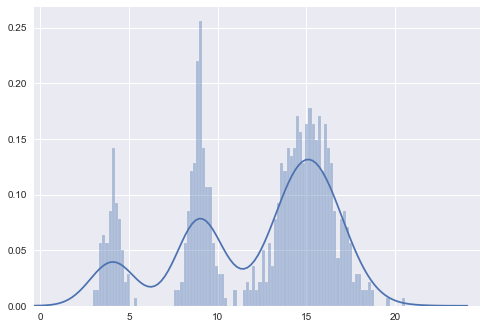

In [10]:
df_gmm = pd.read_csv('GMD_2021.csv', header=None)
data = df_gmm[1].to_numpy()

sns.distplot(data, bins=100)

s_gmd = np.std(data)
mean_gmd = np.mean(data)

plt.xlim(xmin=mean_gmd - 3 * s_gmd, xmax=mean_gmd + 3 * s_gmd)

plt.show()

### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### First way

In [11]:
def pdf(data: np.ndarray, means: np.ndarray, sigmas: np.ndarray) -> np.ndarray:
    numer = np.exp(-0.5 * np.square(data - means) / np.power(sigmas, 2))
    denom = sigmas * np.sqrt(2 * np.pi)

    return numer / denom

In [12]:
def em_gmm(data: np.ndarray, n_iterations: int) -> (np.ndarray, np.ndarray, np.ndarray):
    conv = 1e-15 # convergence

    weights = np.array([[(1 - 0.25) / 2], [0.25], [(1 - 0.25) / 2]])
    means = [[4], [9], [np.mean(data)]]
    sigmas = np.array([
        [0.5],
        [0.5],
        [1.5]
    ])

    data = np.repeat(data[np.newaxis, :], 3, 0)
    for step in range(n_iterations):
        _pdf = pdf(data, means, sigmas)
        respon = _pdf * weights
        denom = np.expand_dims(np.sum(respon, axis=0), 0)
        respon = respon / denom
        means_n = np.sum(respon * data, axis=1)
        means_d = np.sum(respon, axis=1)

        new_weights = np.expand_dims(np.mean(respon, axis=1), -1)

        new_mean = means_n[2] / means_d[2]
        if np.abs(new_mean - means[2][0]) < conv:
            if np.abs(new_weights[0] - weights[0][0]) < conv and np.abs(new_weights[2] - weights[2][0]) < conv:
                break

        means[2][0] = new_mean
        weights[0][0] = new_weights[0]
        weights[2][0] = new_weights[2]

    return np.round(means, 3), sigmas, np.round(weights, 3)

In [13]:
df_gmm = pd.read_csv('GMD_2021.csv', header=None)
data = df_gmm[1].to_numpy()

n = 1000
means, sigmas, weights = em_gmm(data=data, n_iterations=n)

u1, u2, u3 = means[0], means[1], means[2]
s1, s2, s3 = sigmas[0], sigmas[1], sigmas[2]
w1, w2, w3 = weights[0], weights[1], weights[2]

s = '-' * 10
print(f'{s} Means {s}')
print(f'Mean 1: {u1}')
print(f'Mean 2: {u2}')
print(f'Mean 3: {u3}\n')
print(f'{s} Sigmas {s}')
print(f'Sigma 1: {s1}')
print(f'Sigma 2: {s2}')
print(f'Sigma 3: {s3}\n')
print(f'{s} Weights {s}')
print(f'Sigma 1: {w1}')
print(f'Sigma 2: {w2}')
print(f'Sigma 3: {w3}')


---------- Means ----------
Mean 1: [4.]
Mean 2: [9.]
Mean 3: [15.101]

---------- Sigmas ----------
Sigma 1: [0.5]
Sigma 2: [0.5]
Sigma 3: [1.5]

---------- Weights ----------
Sigma 1: [0.125]
Sigma 2: [0.25]
Sigma 3: [0.625]


#### Second way



1. All weights are sum up to 1: $w_1 + w_2 + w_3 = 1$
2. Sum of weighted expected values is equal o mean of all the data: $w_1 * \mu1 + w_2 * \mu2 + w_3 * \mu3 = \mu_{data}$
3. Variance of the GMM: $\sigma_{GMM}^2 = \sum w_i \times E[(X_i - \mu_i)^2] + \sum w_i (\mu_i - \mu)^2$

In [14]:
df_gmm = pd.read_csv('GMD_2021.csv', header=None)
data = df_gmm[1].to_numpy()

mean_data = np.mean(data)
var_data = np.var(data)

u1, u2 = 4, 9
s1, s2, s3 = 0.5, 0.5, 1.5
w2 = 0.25

u3 = 10
w1 = 0.25
w3 = 0.5

def opti_function(v):
    # x[0] - w1
    # x[1] - w3
    # x[2] - u3
    return [
            (v[0] + w2 + v[1]) - 1,
            (v[0] * u1 + w2 * u2 + v[1] * v[2]) - mean_data,
            (v[0] * np.power(s1, 2) + w2 * np.power(s2, 2) + v[1] * np.power(s3, 2)) +
            (v[0] * np.power(u1 - mean_data, 2) + w2 * np.power(u2 - mean_data, 2)+ v[1] * np.power(v[2] - mean_data, 2)) - var_data
    ]

In [15]:
w1_res, w3_res, u3_res = scipy.optimize.fsolve(opti_function, [w1, w3, u3])

s = '-' * 10
print(f'{s} Means {s}')
print(f'Mean 1: {u1}')
print(f'Mean 2: {u2}')
print(f'Mean 3: {u3_res}\n')
print(f'{s} Sigmas {s}')
print(f'Sigma 1: {s1}')
print(f'Sigma 2: {s2}')
print(f'Sigma 3: {s3}\n')
print(f'{s} Weights {s}')
print(f'Sigma 1: {w1_res}')
print(f'Sigma 2: {w2}')
print(f'Sigma 3: {w3_res}')

---------- Means ----------
Mean 1: 4
Mean 2: 9
Mean 3: 15.086229319579349

---------- Sigmas ----------
Sigma 1: 0.5
Sigma 2: 0.5
Sigma 3: 1.5

---------- Weights ----------
Sigma 1: 0.12320049208812564
Sigma 2: 0.25
Sigma 3: 0.6267995079118744


#### Third way

We can estimate $\mu_3, w_1$ and $w_3$ by visualizing the data and see the width, height and the weight of each gaussian.

To start analyze our plot the first thing to do is to connect which parameters belong to specific gaussian. We can see easily that $\mu_1$ is belong to the left gaussian (the center is 4) and $\mu_2$ is belong to the middle gaussian which left us with $\mu_3$ and the right gaussian.

Starting with $\mu_3$, it is easliy to see that the center of the gaussian is around 15 so, $\mu_3 = 15$.

weights are little bit different to estimate. Let's try to look at the mass of the "bell" shape. We can see that the left gaussian is roughly half of the second gaussian's mass and the right gaussian is twice + of the second gaussian's mass.

$w_1 = \frac{w_2}{2} = 0.125 $

$w_3 = w_2\times{2} = 0.5 $

$w_1 + w_2 + w_3$ is equal to 1 so we have some "spare weight" $\rightarrow w_3 = 1 - w_1 - w_2 = 0.625$

We can summary our results:

$\mu_3 = 15$

$w_1 = 0.125$

$w_3 = 0.625$




### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

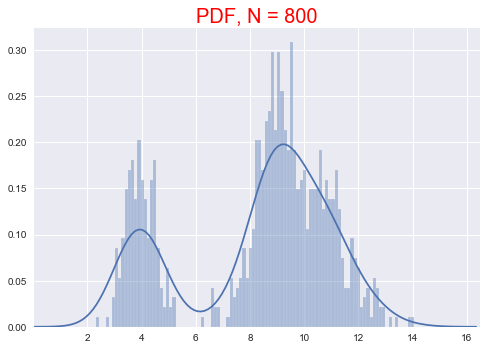

In [16]:
# The limits are where CDF is 0.997 : P(μ - 3s ≤ Y ≤ μ + 3s)
# in this limits we will see 99.7% of the distribution on the graph!

N = data.shape[0]
N1, N2, N3 = int(N * w1), int(N * w2), int(N * w3)

g1 = stats.norm.rvs(loc=u1, scale=s1, size=N1)
g2 = stats.norm.rvs(loc=u2, scale=s2, size=N2)
g3 = stats.norm.rvs(loc=u3, scale=s3, size=N3)

gmm_data = np.concatenate((g1, g2, g3))

sns.distplot(gmm_data, bins=100)

s_gmd = np.std(gmm_data)
mean_gmd = np.mean(gmm_data)

plt.title(f'PDF, N = {N}', fontsize=20, color='red')
plt.xlim(xmin=mean_gmd - 3 * s_gmd, xmax=mean_gmd + 3 * s_gmd)

plt.show()

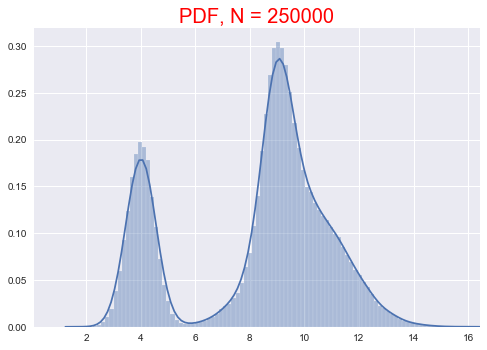

In [17]:
# The limits are where CDF is 0.997 : P(μ - 3s ≤ Y ≤ μ + 3s)
# in this limits we will see 99.7% of the distribution on the graph!

# Setting N to 250K to see more clearly the gaussians.

N = 250000
N1, N2, N3 = int(N * w1), int(N * w2), int(N * w3)

g1 = stats.norm.rvs(loc=u1, scale=s1, size=N1)
g2 = stats.norm.rvs(loc=u2, scale=s2, size=N2)
g3 = stats.norm.rvs(loc=u3, scale=s3, size=N3)

gmm_data = np.concatenate((g1, g2, g3))

sns.distplot(gmm_data, bins=100)

s_gmd = np.std(gmm_data)
mean_gmd = np.mean(gmm_data)

plt.title(f'PDF, N = {N}', fontsize=20, color='red')
plt.xlim(xmin=mean_gmd - 3 * s_gmd, xmax=mean_gmd + 3 * s_gmd)

plt.show()

### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

**First way**

    1. Create a normal distribution by the size N to each of the gaussians.
    2. Create new array by the size N.
    3. looping N times:
        a. get uniform probablity P [0,1].
        b. add to the array a value from one of our gaussians with the probability of its weight.

**Second way**

    1. Create a normal distribution by the size N * weight (gaussian's weight) to each of the gaussians.
    2. Concatenate all the distributions.

### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


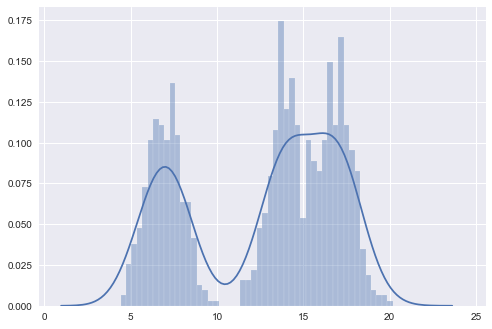

In [18]:
N = 1000
w = 1 / 3
N1, N2, N3 = int(N * w), int(N * w), int(N * w)

g1 = stats.norm.rvs(loc=u1 + 3, scale=1, size=N1)
g2 = stats.norm.rvs(loc=u2 + 5, scale=1, size=N2)
g3 = stats.norm.rvs(loc=u3 + 7, scale=1, size=N3)

gmm_data = np.concatenate((g1, g2, g3))

sns.distplot(gmm_data, bins=50)

s_gmd = np.std(gmm_data)
mean_gmd = np.mean(gmm_data)

plt.xlim(xmin=mean_gmd - 3 * s_gmd, xmax=mean_gmd + 3 * s_gmd)

plt.show()

### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


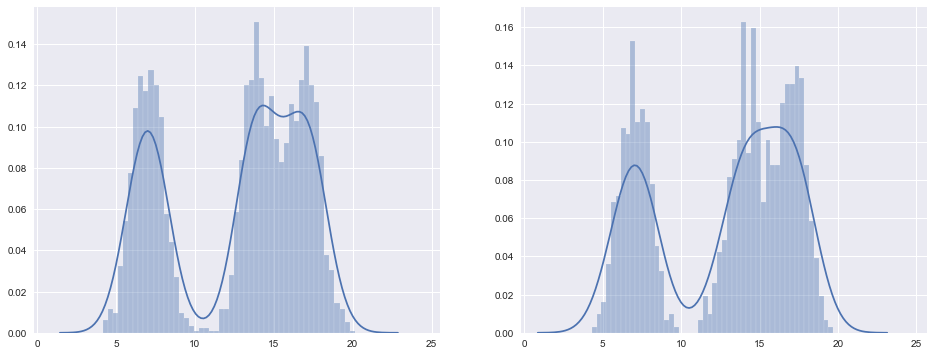

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

N = 1000
w = 1 / 3

g1 = stats.norm.rvs(loc=u1 + 3, scale=1, size=N)
g2 = stats.norm.rvs(loc=u2 + 5, scale=1, size=N)
g3 = stats.norm.rvs(loc=u3 + 7, scale=1, size=N)

gmm_data = []
for i in range(N):
    p = stats.uniform.rvs(size=1)
    if p < w:
        gmm_data.append(np.random.choice(a=g1, size=1))
    elif p < w + w:
        gmm_data.append(np.random.choice(a=g2, size=1))
    else:
        gmm_data.append(np.random.choice(a=g3, size=1))


gmm_data = np.concatenate((g1, g2, g3))

N1, N2, N3 = int(N * w), int(N * w), int(N * w)

g1_2 = stats.norm.rvs(loc=u1 + 3, scale=1, size=N1)
g2_2 = stats.norm.rvs(loc=u2 + 5, scale=1, size=N2)
g3_2 = stats.norm.rvs(loc=u3 + 7, scale=1, size=N3)

gmm_data_2 = np.concatenate((g1_2, g2_2, g3_2))

sns.distplot(gmm_data, ax=ax[0], bins=50)
sns.distplot(gmm_data_2, ax=ax[1], bins=50)

s_gmd = np.std(gmm_data)
mean_gmd = np.mean(gmm_data)

s_gmd_2 = np.std(gmm_data_2)
mean_gmd_2 = np.mean(gmm_data_2)

ax[0].set_xlim(xmin=mean_gmd - 3 * s_gmd, xmax=mean_gmd + 3 * s_gmd)
ax[1].set_xlim(xmin=mean_gmd_2 - 3 * s_gmd_2, xmax=mean_gmd_2 + 3 * s_gmd_2)

plt.show()

# Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [20]:
n = 50000000
mean = 70000
sigma = 30000

ds = np.random.normal(loc=mean, scale=sigma, size=n)

## 4.A
What percent of people earn less than 50,000 RCU?

In [21]:
res = scipy.stats.norm(mean, sigma).cdf(50000)
res = np.round(res, 3)

print(res * 100, '%')

25.2 %


**Checking**

In [22]:
res = np.where(ds < 50000)[0].shape[0] / n
res = np.round(res, 3)

print(res * 100, '%')

25.3 %


## 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [23]:
res = scipy.stats.norm(mean, sigma).cdf(65000) - scipy.stats.norm(mean, sigma).cdf(45000)
res = np.round(res, 3)

print(res * 100, '%')

23.1 %


**Checking**

In [24]:
res = np.where((ds > 45000) & (ds < 65000))[0].shape[0] / n
res = np.round(res, 3)

print(res * 100, '%')

23.1 %


## 4.C
What percent of people earn more than 70,000 RCU?

In [25]:
res = 1 - scipy.stats.norm(mean, sigma).cdf(70000)
res = np.round(res, 3)

print(res * 100, '%')

50.0 %


**Checking**

In [26]:
res = np.where(ds > 70000)[0].shape[0] / n
res = np.round(res, 3)

print(res * 100, '%')

50.0 %


## 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [27]:
res = 1 - scipy.stats.norm(mean, sigma).cdf(140000)
emp = np.round(res * 1000, 2)

print(emp, ' employees, must be integer ->', np.round(emp, 0), 'employees' )

9.82  employees, must be integer -> 10.0 employees


**Checking**

In [28]:
res = np.where(ds > 140000)[0].shape[0] / n
emp = np.round(res * 1000, 2)

print(emp, ' employees, must be integer ->', np.round(emp, 0), 'employees' )

9.82  employees, must be integer -> 10.0 employees


## 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

**Answer**

first, we need to calculate the $p$ for one group to has salary avg between 50K to 70K. After we obtain the $p$ we can simulate binomial test...


In [29]:
sig = sigma / 20 # 20 - groups

p = scipy.stats.norm(mean, sig).cdf(70000) - scipy.stats.norm(mean, sig).cdf(50000)
p

res = 1 - scipy.stats.binom.cdf(k = 10, n = 20, p=p)
print("The probability is:", np.round(res, 3))

The probability is: 0.412


**Checking**

In [30]:
def tester() -> int:
    n = 10000
    mean = 70000
    sigma = 30000

    ds = np.random.normal(loc=mean, scale=sigma, size=n)
    np.random.shuffle(ds)

    groups = 20
    splited = np.zeros((groups, int(n / groups)))

    for i in range(groups):
        splited[i, :] = ds[int(i * n / groups): int((i + 1) * n / groups)]

    avgs = np.mean(splited, axis=1)

    return np.where((avgs >= 50000) & (avgs <= 70000))[0].shape[0]

In [31]:
test_n = 10000
test = np.zeros(test_n)

for i in range(test.shape[0]):
    test[i] = tester()

res = np.where(test > 10)[0].shape[0] / test_n
print(res)

0.4163


# Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

## 5.A
Write code to compute the exact value of $E(T_{N})$

We know that $E(T_N) = N \times H(N)$ where $H$ is the harmonic series

In [32]:
def harmonic_series(n: int) -> np.ndarray:
    return np.array([1 / (i + 1) for i in range(n)])

In [33]:
def expectation_tn(N):
    harmonic_n = harmonic_series(N)
    return N * np.sum(harmonic_n)

In [34]:
expectation_tn(100)

518.737751763962

## 5.B
Write code to compute the exact value of $V(T_{N})$

We know that $V(T_N) = N^2\times \sum_{i=1}^{N}\frac{1}{i^2} - N\times \sum_{j=1}^{N}\frac{1}{j}$

In [35]:
def var_tn(N):
    harmonic_n = harmonic_series(N)
    return (np.power(N, 2) * np.sum(np.power(harmonic_n, 2))) - (N * np.sum(harmonic_n))

In [36]:
var_tn(100)

15831.10125008497

## 5.C
Write code to exactly compute $P(T_{20}>40)$

In [37]:
def geometry_distribution(attemps: np.ndarray, prob: float) -> np.ndarray:
    return [np.power(1 - prob, i - 1) * prob for i in attemps]

In [38]:
def calc_coup_more_than(n, attempts):
    p = (n - np.arange(n)) / n

    attempt_arr = np.arange(attempts) + 1
    prob_first = geometry_distribution(attempt_arr, p[0])

    for step in p[1:]:
        p_step = geometry_distribution(attempt_arr, step)
        prob_first = np.convolve(prob_first, p_step, mode='full')

    return 1 - np.sum(prob_first[:n + 1])

In [39]:
res = calc_coup_more_than(20, 40)

print(res)

0.9641122736925725


## 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [40]:
ex = expectation_tn(20)

print(ex)

71.95479314287364


In [41]:
va = var_tn(20)

print(va)

566.5105044223357


In [42]:
1 - (va / np.power(ex - 40, 2))

0.44520064682904903




We know that:

$P(\mu - b \sigma \leq Y \leq \mu + b\sigma) \geq 1 - \frac{1}{b^2}$

We need to change what we did in section C so:

$\mu - b \sigma = 40 \rightarrow b = \frac{\mu - 40}{\sigma} \rightarrow$

$P(40 \leq Y \leq 2\mu - 40) \geq 1 - \frac{1}{(\frac{\mu - 40}{\sigma})^2} = 1 - \frac{\sigma^2}{(\mu - 40)^2} = 1 - \frac{566.5105}{(71.9547 - 40)^2} = 0.4452$ 

$P(40 \leq Y \leq 2\mu - 40) \geq 0.4452$ 

Our lower bound is much lower than the real probabilty this because we trying to find bound for $2\mu - 40 = 103.9$ and in 5.C we actully summing up all probs to $\infty$.

